# Group 9 Project Proposal - An Analysis of University Exam Performance Factors

### Introduction:

Many factors can be attributed to high university exam performance: study time, knowledge level, and performance in related examinations. Alone, individual factors cannot determine a student's exam performance with a high level of certainty (see <i>Preliminary Data analysis</i>), however, their strength when used together in a predictive model has yet to be demonstrated.

This begs the question: <b>Can regression using study time, knowledge level, and performance in related examinations, be used to successfully predict the exam performance of students and if so, which predictors are the most accurate?</b>

This project seeks to answer this question by analyzing and constructing a regression based on the dataset, <i>User Knowledge Modeling Data Set</i> (Kahraman et al., 2013), which recorded exam performance of students in the subject of Electrical DC Machines.

### Preliminary Data Analysis:

We previously downloaded the data to a "data" folder. It was cleaned to only include the columns used in the model. Scatterplots of each factor vs. exam performance were generated. 

It is clear that individual factors cannot accurately assess a student's exam performance due to the lack of observable relationship between each factor and exam performance.

In [11]:
# run this:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(readxl)
library(RColorBrewer)

In [12]:
# viewing options, can change according to reader preferences
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 11, repr.plot.height = 9)

In [13]:
training_data <- read_excel("data/User_knowledge.xls", sheet = 2) %>%
            select(STG, LPR, PEG, UNS) %>%
            rename(study_time_goal = STG,
                  exam_performance_related = LPR,
                  exam_performance_goal = PEG,
                  knowledge_level = UNS) %>%
            mutate(knowledge_level = as_factor(knowledge_level)) 
training_data

New names:
* `` -> ...7
* `` -> ...8



study_time_goal,exam_performance_related,exam_performance_goal,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.24,0.90,High
0.06,0.25,0.33,Low
⋮,⋮,⋮,⋮
0.54,0.29,0.77,High
0.50,0.61,0.26,Middle
0.66,0.87,0.74,High


In [14]:
study_data <- training_data %>%
        group_by(knowledge_level) %>%
        summarize(avg_exam_perf_goal = mean(exam_performance_goal),
                  avg_exam_perf_rel = mean(exam_performance_related),
                 avg_study_time = mean(study_time_goal),
                 number_of_observations = n()) %>%
        arrange(desc(avg_exam_perf_goal))
study_data

`summarise()` ungrouping output (override with `.groups` argument)



knowledge_level,avg_exam_perf_goal,avg_exam_perf_rel,avg_study_time,number_of_observations
<fct>,<dbl>,<dbl>,<dbl>,<int>
High,0.77253968,0.5012698,0.4216508,63
Middle,0.54238636,0.3428409,0.3999773,88
Low,0.23762651,0.4973494,0.3211446,83
very_low,0.09083333,0.3587500,0.3057917,24


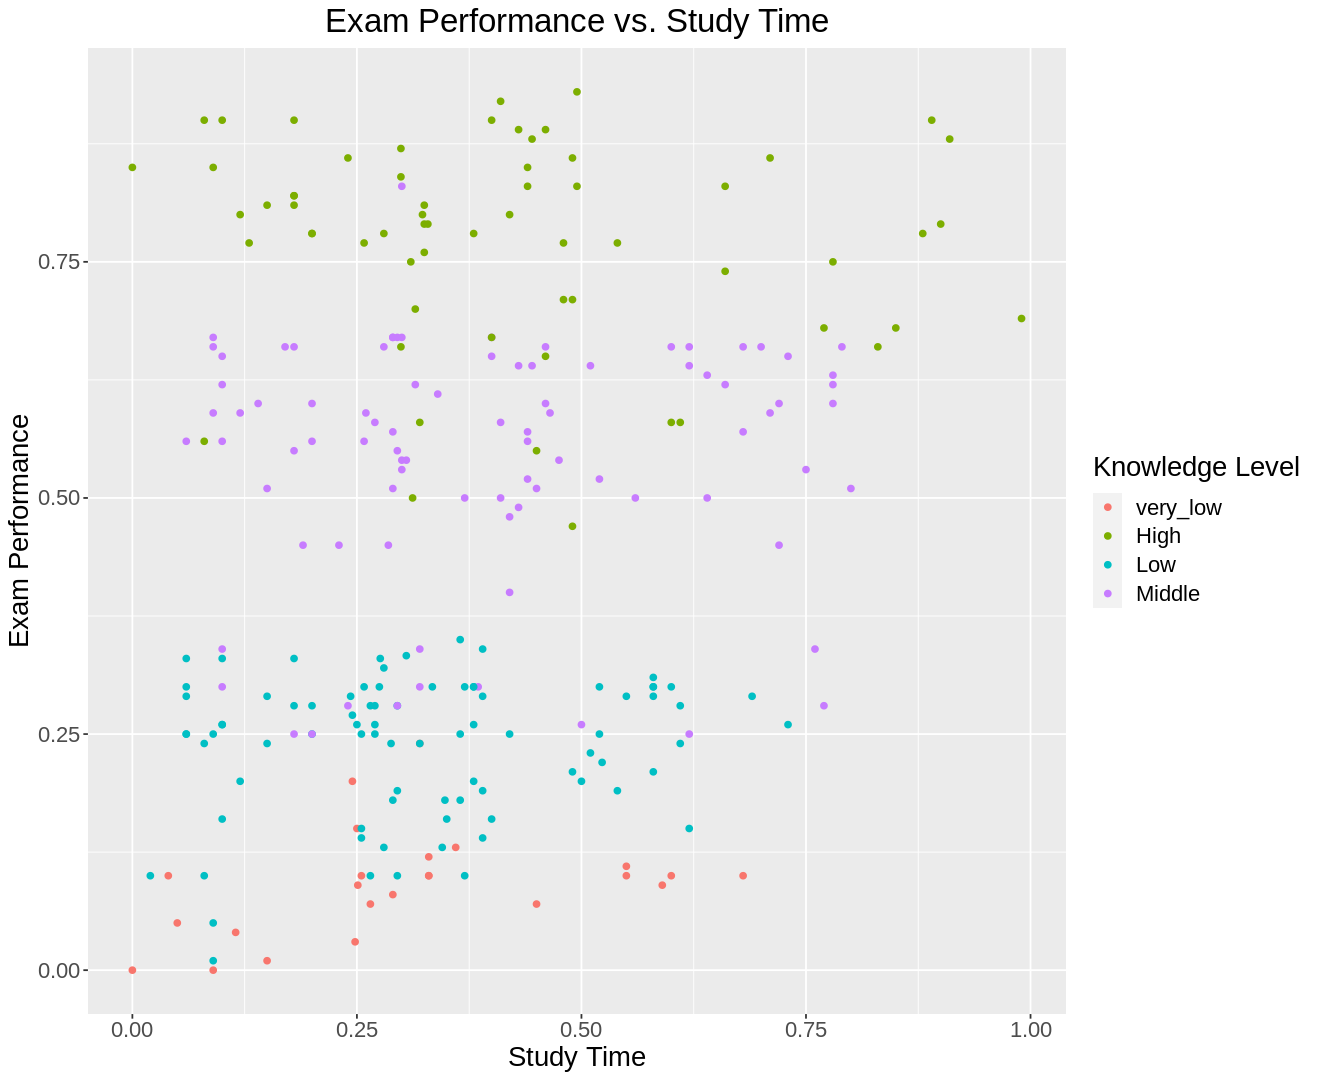

In [15]:
exam_plot_study <- training_data %>%
            ggplot(aes(x = study_time_goal, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            labs(x = "Study Time", y = "Exam Performance", color = ("Knowledge Level")) +
            ggtitle("Exam Performance vs. Study Time") +
            theme(text = element_text(size = 16.5)) +
            theme(plot.title = element_text(hjust = 0.5))
exam_plot_study


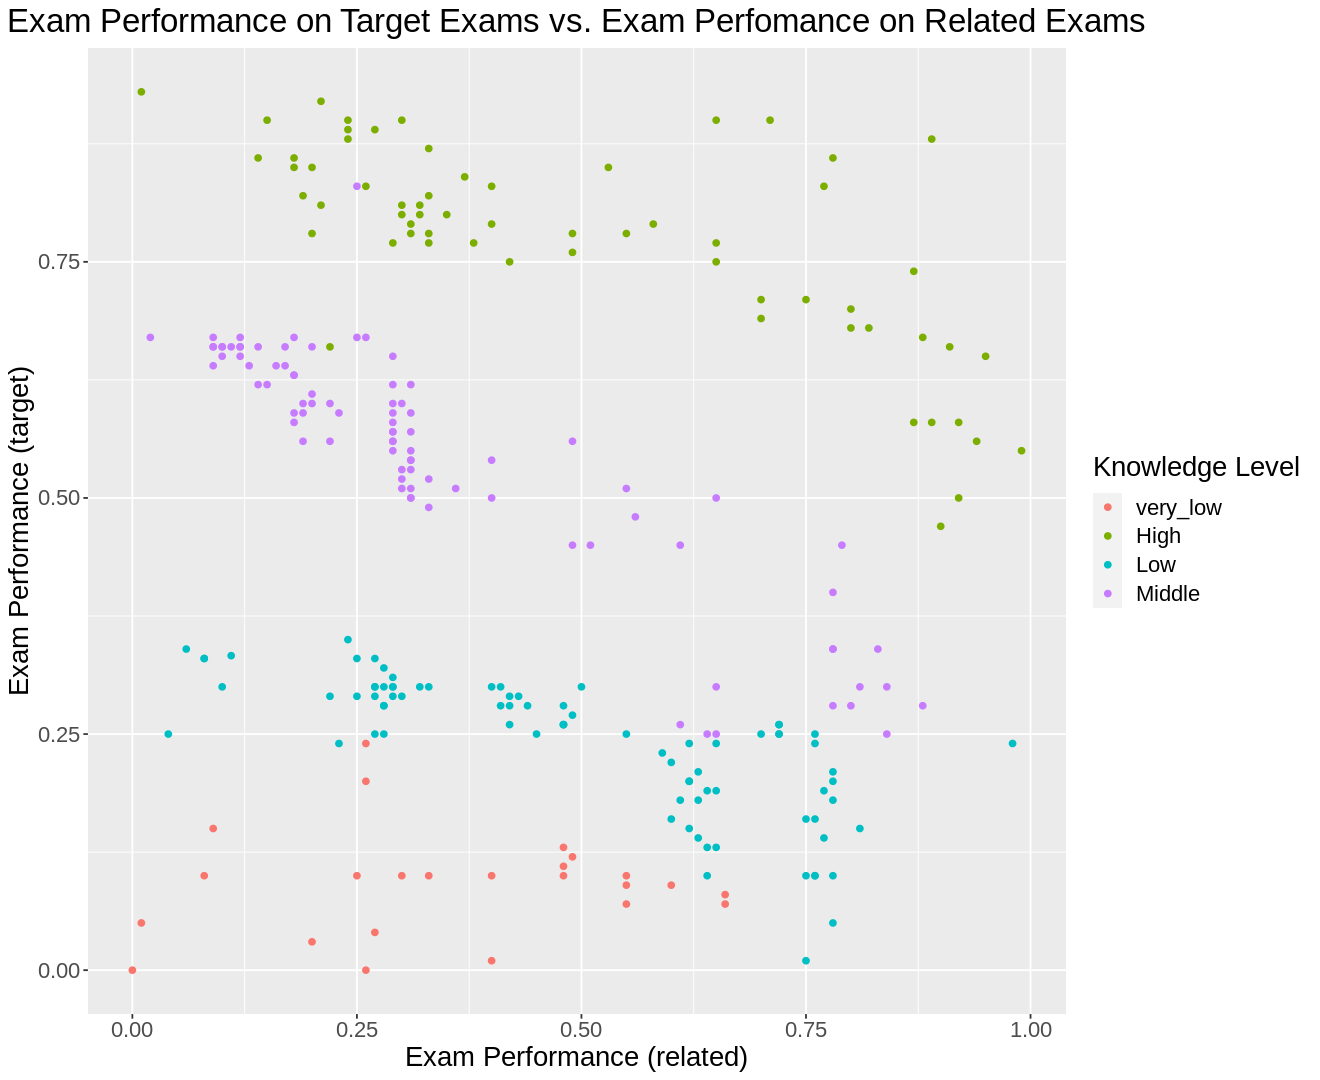

In [16]:
exam_plot_related <- training_data %>%
            ggplot(aes(x = exam_performance_related, y = exam_performance_goal)) +
            geom_point(aes(color = knowledge_level)) +
            labs(x = "Exam Performance (related)", y = "Exam Performance (target)", color = ("Knowledge Level")) +
            ggtitle("Exam Performance on Target Exams vs. Exam Perfomance on Related Exams") +
            theme(text = element_text(size = 16.5)) +
            theme(plot.title = element_text(hjust = 0.5))
exam_plot_related


### Methods:

We hope to develop a <b> KNN regression model</b> using study time, related exam performance, and knowledge level as predictors of target exam performance. KNN regression was chosen to allow for a quantitative prediction of the response variable.

These predictors were selected to factor in a student's baseline knowledge (related exam performance and knowledge level) and studying to improve knowledge (study time). The downloaded dataset was already split into training and testing sets, which assists in constructing our models.

Using the training set and identified factors, we will construct KNN regression models combining Study Time + Knowledge Level and Related Exam Score + Knowledge Level. In particular, we will set neighbors to tune() and set_mode(...) to "regression" in the specification. We will then perform a 5-fold cross-validation and find the RMSPE of each K-value. We can then <b>determine the K-value that provides the lowest RMSPE using a line graph of RMSPE vs. K</b>.

<b>See sample code:</b>

In [17]:
# ..._recipe <- recipe(exam_performance_goal ~ exam_performance_related + knowledge_level + study_time_goal, data = training_data)

# ..._spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
#     set_engine("kknn") |>
#     set_mode("regression")

# ..._vfold <- vfold_cv(training_data, v = 5, strata = exam_performance_goal)

# ..._wkflw <- workflow() |>
#   add_recipe(..._recipe) |>
#   add_model(..._spec)

# ..._results <- ..._wkflw |>
#     tune_grid(resamples = ..._vfold, grid = gridvals) |>
#     collect_metrics() |>
#     filter(.metric == "rmse")

# ..._min <- ..._results |>
#     filter(mean == min(mean))

After, we can determine the more accurate model by selecting the model with the lower RMSPE.

### Expected Outcomes & Significance:

##### <i> What Do You Expect to Find? </i>

We suspect that exam performance can be determined by considering study time, scores on related exams, and knowledge level.

Based on the scatterplot, all 3 factors do not appear to have a direct relationship with exam performance, as such, multiple confounding variables may be at play. High levels in the other factors may compensate for a deficiency in a given factor. To test this, all variables will be used as predictors of the regression. 

We believe that the model using Related Exam Score + Study Time will be more accurate as the scatterplot of Related Exam Score vs. Target Exam Score appears to have a stronger relationship compared to the plot of Study Time vs. Target Exam Score.

##### <i> What Impact Could Such Findings Have? </i>

Students and teachers can use the model as an assessment tool. Students will be able to self-analyze their work, resulting in improved learning and academic performance. Teachers can use this tool to identify struggling students and ensure they are supported.

##### <i> What Future Questions Could This Lead To? </i>

Scatterplot 2 shows a slight negative relationship between related exam performance and goal exam performance within each knowledge level. Future research could examine methods to improve study skills, focusing on time allocation between goal material and related material. Refining these skills may help students utilize their study time more efficiently.